## Test of plotting images with yolo annotations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from matplotlib.patches import Rectangle
from pathlib import Path

In [11]:
def plot_bb_ss_2(img1, border_img1):

    img = Image.open(img1)
    row = 1
    col=1

    plt.figure()
    fig, axs = plt.subplots(row, col)

    axs.imshow(img)
    axs.set_title(f"Ground Truth \n ")


    for border in border_img1:
        axs.add_patch(border)

        
    axs.legend(loc='lower right')

    plt.show()

In [3]:
def find_border(x1, y1, x2, y2):   
        #(x1, y1) = top left corner, (x2, y2) = bottom right corner
        box_height = y2 - y1
        box_width = x2 - x1
        border = Rectangle((x1, y1), box_width, box_height, linewidth=1, edgecolor ='red', facecolor = 'none', fill=False) 
        return border

def find_border_yolo(x_center, y_center, box_width, box_height, height, width, label_box, color):    
        xmin = (x_center * width) - ((box_width*width)/2)
        ymin = (y_center * height) - ((box_height*height)/2)
        border = Rectangle((xmin, ymin), (box_width * width), (box_height * height), linewidth=1, edgecolor = color, label=label_box, facecolor = 'none', fill=False) 
        return border

In [4]:
def read_txtfile(file, predict=False):
    array = []

    with open(file, "r") as txtfile:
        for line in txtfile:
            line_array = []

            line = line.replace("\n", "")
            line = line.split(" ")
            label = line[0]
            x_center = line[1]
            y_center = line[2]
            box_width = line[3]
            box_height = line[4]
            if predict == True:
                conf = line[5]
                line_array.extend([label, x_center, y_center, box_width, box_height, conf])
            else:
                line_array.extend([label, x_center, y_center, box_width, box_height])
            array.append(line_array)
            
    txtfile.close()
    return array



In [6]:
def image_bb(image_path, ground_truth):
    img = Image.open(image_path)
    height = img.height
    width = img.width

    colors = ["red", "blue", "orange", "green"]

    #Ground Truth
    ground_truth_array = read_txtfile(ground_truth)
    ground_truth_box = []
    
    for number, element in enumerate(ground_truth_array):
        label = element[0]
        if label == "0":
            label = "Transversal"
        elif label == "1":
            label = "Longitudinal"
        elif label == "2":
            label = "Vessel"
        elif label == "3":
            label = "Anastomosis"
        elif label == "4":
            label = "Aorta"
        border = find_border_yolo(float(element[1]), float(element[2]), float(element[3]), float(element[4]), height, width, label, colors[number])
        ground_truth_box.append(border)



    return ground_truth_box

In [8]:
def print_all(ground_truth, image_path):
    ground_truth_box = image_bb(image_path, ground_truth)
    plot_bb_ss_2(image_path, ground_truth_box)



<Figure size 640x480 with 0 Axes>

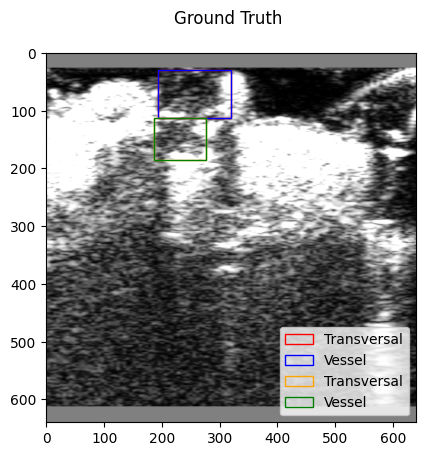

In [12]:
#Example image with two vessels.
ground_truth = "/Volumes/T7/Master/Data_augment/Yolov5/Request_da_2/labels/train/0a0cb4b3-da1b-47e9-90ef-7bedde34c28a_42_aug_1.txt"
image_path = "/Volumes/T7/Master/Data_augment/Yolov5/Request_da_2/images/train/0a0cb4b3-da1b-47e9-90ef-7bedde34c28a_42_aug_1.png"

print_all(ground_truth, image_path)